In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

In [2]:
DATA_HOME = os.path.join("..","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

In [3]:
df = data["ADVANC"]
df.index

Index(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07', '2014-01-08',
       '2014-01-09', '2014-01-10', '2014-01-13', '2014-01-14', '2014-01-15',
       ...
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02',
       '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10'],
      dtype='object', name='Date', length=1573)

In [4]:
# Drop volume

df = df.drop(columns=['Volume'])
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Adj Close'], dtype='object')

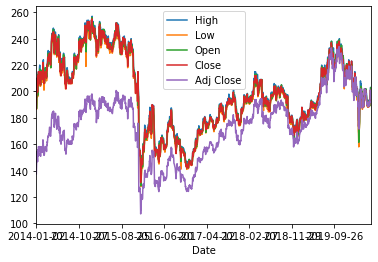

In [5]:
df.plot()

## Resample to Weekly

Resample to weekly data

In [6]:
df['2014-01-01':'2016-12-31'] # 2014-2016

,High,Low,Open,Close,Adj Close
Date,,,,,
2014-01-02,198.5,187.0,198.0,187.0,137.609299
2014-01-03,196.0,186.5,187.0,196.0,144.232224
2014-01-06,203.0,191.0,195.0,201.0,147.911621
2014-01-07,210.0,200.0,205.0,210.0,154.534515
2014-01-08,210.0,203.0,208.0,206.0,151.591019
...,...,...,...,...,...
2016-12-26,145.5,144.5,145.0,145.0,126.894188
2016-12-27,145.5,144.0,145.5,144.0,126.019043
2016-12-28,145.0,144.0,144.5,144.5,126.456635


In [7]:
df.index = pd.to_datetime(df.index)

# Resample to Month-end

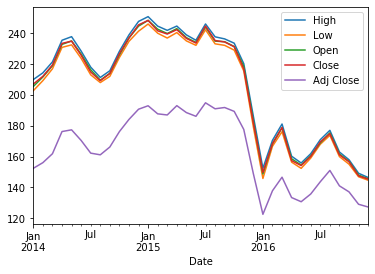

In [8]:
# 2014-2016: resample to monthly
monthly = df['2014-01-01':'2016-12-31'].resample('1M').mean()
monthly.plot()

In [9]:
monthly.head()

,High,Low,Open,Close,Adj Close
Date,,,,,
2014-01-31,210.068182,202.840909,205.590909,207.159091,152.443960
2014-02-28,214.421053,209.368421,211.736842,212.157895,156.122471
2014-03-31,221.523810,217.047619,219.047619,219.476190,161.916752
2014-04-30,235.578947,230.947368,232.894737,233.526316,176.313127
2014-05-31,237.894737,232.578947,235.105263,235.000000,177.425758


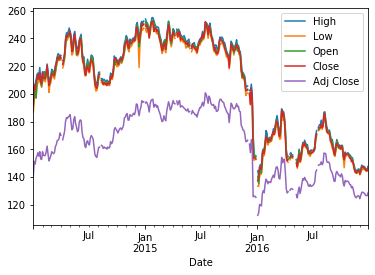

In [10]:
# 2014-2016: resample to 3-day
period_3days = df['2014-01-01':'2016-12-31'].resample('3D').mean()
period_3days.plot()

In [11]:
period_3days.head()

,High,Low,Open,Close,Adj Close
Date,,,,,
2014-01-02,197.25,186.750000,192.5,191.500000,140.920761
2014-01-05,206.50,195.500000,200.0,205.500000,151.223068
2014-01-08,207.00,200.333333,203.0,202.833333,149.260742
2014-01-11,210.00,197.000000,197.0,209.000000,153.798630
2014-01-14,214.00,205.333333,209.0,210.666667,155.025121


# Daily Returns

Compute daily returns from daily closing price.

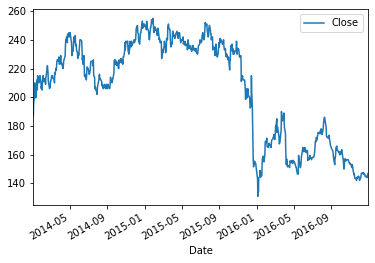

In [12]:
daily = df['2014-01-01':'2016-12-31'][['Close']]
daily.plot()

In [13]:
daily["DailyReturn"] = np.log(daily["Close"].shift(-1)/daily["Close"])
daily

,Close,DailyReturn
Date,,
2014-01-02,187.0,0.047006
2014-01-03,196.0,0.025190
2014-01-06,201.0,0.043803
2014-01-07,210.0,-0.019231
2014-01-08,206.0,-0.014670
...,...,...
2016-12-26,145.0,-0.006920
2016-12-27,144.0,0.003466
2016-12-28,144.5,0.017153


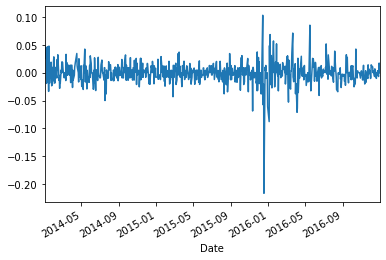

In [14]:
# Plot of daily return

daily["DailyReturn"].plot()

# Daily Volatility

Daily volatility estimate from sample by calculating standard deviation. Then it is converted to annual volatility by multipying 252.

Method referenced:
- https://www.investopedia.com/ask/answers/021015/how-can-you-calculate-volatility-excel.asp
- https://zerodha.com/varsity/chapter/volatility-calculation-historical/

In [15]:
daily_volatility = daily["DailyReturn"].std()
annual_volatility = daily_volatility * np.sqrt(252)

daily_volatility, annual_volatility

(0.019042772805392967, 0.3022946466970415)

Daily Variaty

(High - Low) / Close

Method referenced:
- https://finance.zacks.com/calculate-daily-price-variation-stocks-8299.html

In [16]:
daily["Variation"] = (df["High"] - df["Low"]) / df["Close"]

daily[["DailyReturn", "Variation"]]

,DailyReturn,Variation
Date,,
2014-01-02,0.047006,0.061497
2014-01-03,0.025190,0.048469
2014-01-06,0.043803,0.059701
2014-01-07,-0.019231,0.047619
2014-01-08,-0.014670,0.033981
...,...,...
2016-12-26,-0.006920,0.006897
2016-12-27,0.003466,0.010417
2016-12-28,0.017153,0.006920


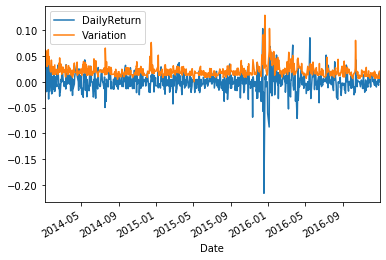

In [17]:
daily[["DailyReturn", "Variation"]].plot()

# Invariant Check

[Meucci2005] suggests to use stock weekly return because it is an invariant. Invariants essentially gives i.i.d. sample, which makes it suitable for machine learning algorithm.

[Meucci2005] define two tests: 1. split and plot histogram to see distribution, 2. scatter plot with lag should be circle.

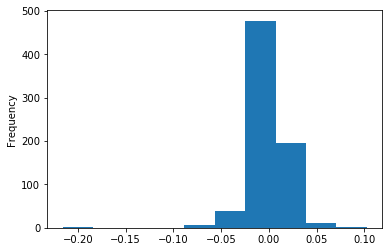

In [20]:
daily["DailyReturn"].plot.hist() # Total

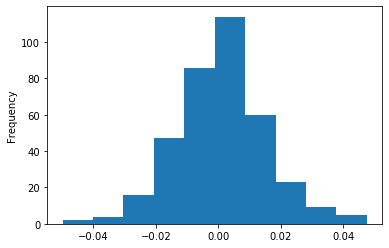

In [24]:
daily["DailyReturn"][0:int(len(daily)/2)].plot.hist() # first half

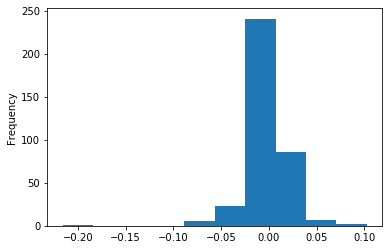

In [26]:
daily["DailyReturn"][int(len(daily)/2):].plot.hist() # second half

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


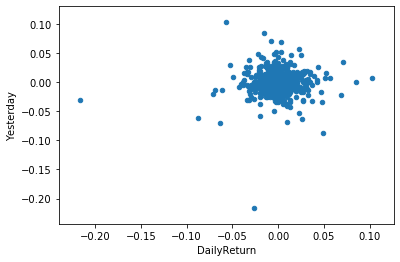

In [34]:
chk_scatter = daily[["DailyReturn"]]
chk_scatter["Yesterday"] = chk_scatter["DailyReturn"].shift(1)
chk_scatter = chk_scatter.dropna()
chk_scatter.plot.scatter(x="DailyReturn", y="Yesterday")

# Daily data is not quit an invariant. Try 3-day period.

Calculate returns using compound return (log)

In [43]:
period_3days["Returns"] = np.log(period_3days["Close"]/period_3days["Close"].shift(-1))

period_3days.head()

,High,Low,Open,Close,Adj Close,Returns
Date,,,,,,
2014-01-02,197.25,186.750000,192.5,191.500000,140.920761,-0.070558
2014-01-05,206.50,195.500000,200.0,205.500000,151.223068,0.013061
2014-01-08,207.00,200.333333,203.0,202.833333,149.260742,-0.029950
2014-01-11,210.00,197.000000,197.0,209.000000,153.798630,-0.007943
2014-01-14,214.00,205.333333,209.0,210.666667,155.025121,-0.015699


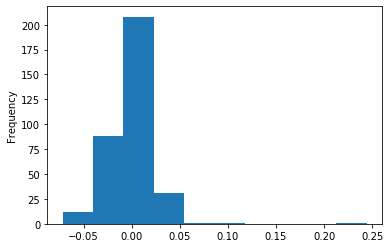

In [44]:
period_3days["Returns"].plot.hist()

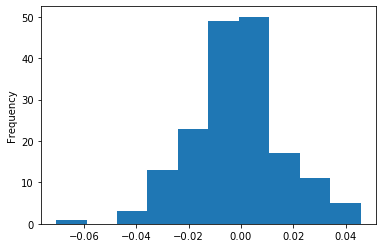

In [46]:
period_3days["Returns"][0:int(len(period_3days)/2)].plot.hist() # first half

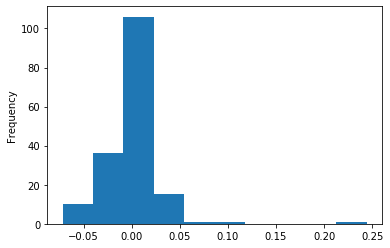

In [47]:
period_3days["Returns"][int(len(period_3days)/2):].plot.hist() # second half

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


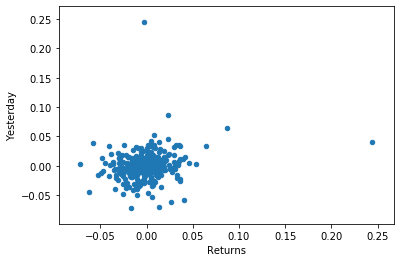

In [50]:
chk_scatter = period_3days[["Returns"]]
chk_scatter["Yesterday"] = chk_scatter["Returns"].shift(1)
chk_scatter = chk_scatter.dropna()
chk_scatter.plot.scatter(x="Returns", y="Yesterday")

# Monthly data

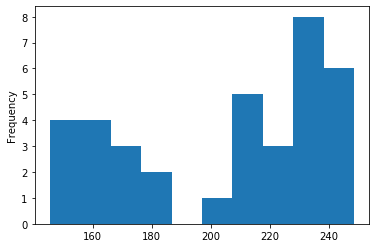

In [39]:
monthly["Close"].plot.hist()